In [2]:
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

path = 'C:\\Users\\moham\\Desktop\\Third Year Project\\Dataset\\'

columns = ['class','l_shoulder','r_shoulder','l_arm','r_arm','l_hip','r_hip','l_knee','r_knee']



y82_test = pd.read_csv(path+'y82_testing.csv', header=None)
y82_train = pd.read_csv(path+'y82_training.csv', header=None)
L_test = pd.read_csv(path+'L_testing.csv', header=None)
L_train = pd.read_csv(path+'y82_training.csv', header=None)

df = pd.concat([y82_train, y82_test, L_test, L_train])

df.columns = columns

mean = df.mean()
std = df.std()

labels = df['class']

# Standardizing data
df = (df - mean) / std

# add the label back in factorize 
df['class'] = labels
df['class'], classes = pd.factorize(df['class'])
classes = list(classes)
df

C:\Users\moham\AppData\Local\Temp\ipykernel_21512\876899284.py:22: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()
C:\Users\moham\AppData\Local\Temp\ipykernel_21512\876899284.py:23: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = df.std()


,class,l_arm,l_hip,l_knee,l_shoulder,r_arm,r_hip,r_knee,r_shoulder
0,0,-2.340085,1.070243,0.891014,-1.062026,-2.171600,-1.392604,-2.228168,-1.253457
1,0,0.508591,-0.381681,-1.078167,0.809299,0.512155,-0.424803,-0.778774,0.880026
2,0,0.671201,-0.206598,-0.924971,-0.239279,0.704072,-0.253238,-0.735069,-0.274926
3,0,-2.590058,-1.311570,-0.431164,-1.302879,-2.015504,-0.528483,-0.082272,-0.666216
4,0,-2.006989,-1.311362,-1.001761,-1.850141,-2.813382,-1.675496,-0.896085,-1.994957
...,...,...,...,...,...,...,...,...,...
685,3,0.941778,1.742653,0.448479,-1.618022,0.879380,-0.826484,0.727046,-2.054292
686,3,0.036457,1.187479,0.405367,0.520723,0.335457,0.051475,1.065580,0.463199
687,3,0.306287,1.163134,0.483480,0.623091,0.279426,0.052078,0.683337,0.534690
688,3,0.929429,0.033876,0.737131,0.659109,1.000924,1.731425,0.678999,0.588676


Doing K-NN Kfold kinda manually using lab stuff

In [5]:
'''
Extracts labels and data. 
Returns: Data, Classes 
'''
def split_df(df):
    return df.drop('class', axis=1), df['class']

#define function to  calculate accuracy
def acc(predictions, ground_truth):
    TPTN = 0 
    
    for pred, truth in zip(predictions, ground_truth):
        TPTN += pred == truth 
        
    return TPTN, len(predictions)


def cross_validation(df, k, fold):
    kf = KFold(fold)
    
    g_tptn = 0 
    g_total = 0 
    
    for train, validation in kf.split(df):
        train_df = df.iloc[train].copy()
        validation_df = df.iloc[validation].copy()
        
        model = KNN(n_neighbors = k)
        
        train_data, train_labels = split_df(train_df)
        model.fit(train_data, train_labels)
        
        validation_data, validation_labels = split_df(validation_df)
        
        predictions = model.predict(validation_data)
        
        TPTN, total = acc(predictions, validation_labels)
        
        g_tptn += TPTN
        g_total += total 
        
    return g_tptn / g_total 

for k in range(1, 20):
    print(f'{k=} | fold = 10 | Acc: {cross_validation(df, k=k, fold=10)}')

k=1 | fold = 10 | Acc: 0.9140271493212669
k=2 | fold = 10 | Acc: 0.9064856711915535
k=3 | fold = 10 | Acc: 0.8868778280542986
k=4 | fold = 10 | Acc: 0.8788335847159376
k=5 | fold = 10 | Acc: 0.881850175967823
k=6 | fold = 10 | Acc: 0.8793363499245852
k=7 | fold = 10 | Acc: 0.8763197586726998
k=8 | fold = 10 | Acc: 0.8788335847159376
k=9 | fold = 10 | Acc: 0.8758169934640523
k=10 | fold = 10 | Acc: 0.8768225238813474
k=11 | fold = 10 | Acc: 0.8763197586726998
k=12 | fold = 10 | Acc: 0.877325289089995
k=13 | fold = 10 | Acc: 0.8793363499245852
k=14 | fold = 10 | Acc: 0.8783308195072901
k=15 | fold = 10 | Acc: 0.8793363499245852
k=16 | fold = 10 | Acc: 0.877325289089995
k=17 | fold = 10 | Acc: 0.877325289089995
k=18 | fold = 10 | Acc: 0.8768225238813474
k=19 | fold = 10 | Acc: 0.8763197586726998


Using more libs this time, maybe get better accuracy

In [34]:
# Using Cross Validation 
X, Y = split_df(df)

def cv(k):
    knn = KNN(n_neighbors=k)
    cv_scores = cross_val_score(knn, X, Y, cv=10)

    print(f'K: {k} Acc: {np.mean(cv_scores)}')

for k in range(1, 25):
    cv(k)

K: 1 Acc: 0.9683391706004771
K: 2 Acc: 0.9477158519872088
K: 3 Acc: 0.9306177351403481
K: 4 Acc: 0.9230775087559007
K: 5 Acc: 0.9306202730825845
K: 6 Acc: 0.9276051977057003
K: 7 Acc: 0.9255976853966803
K: 8 Acc: 0.9256002233389168
K: 9 Acc: 0.9245926602710522
K: 10 Acc: 0.9255976853966803
K: 11 Acc: 0.9256027612811533
K: 12 Acc: 0.9240926856504746
K: 13 Acc: 0.9235901730876606
K: 14 Acc: 0.9240926856504746
K: 15 Acc: 0.9261027359017309
K: 16 Acc: 0.9250951728338663
K: 17 Acc: 0.9245951982132887
K: 18 Acc: 0.9230851225826099
K: 19 Acc: 0.9215750469519313
K: 20 Acc: 0.9210725343891172
K: 21 Acc: 0.92308512258261
K: 22 Acc: 0.9215775848941676
K: 23 Acc: 0.9215775848941676
K: 24 Acc: 0.9220800974569817


In [94]:
X, y = split_df(df)

from sklearn.model_selection import train_test_split
# 80/20 Split of data, Doesn't randomize, Randomsplit ensures the proportion of classes is the same. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_neighbours = int(np.sqrt(len(X_train)))
knn_algorithms = ['kd_tree', 'brute', 'ball_tree']

# Grid searching best hyper params 
from sklearn.model_selection import GridSearchCV
knn = KNN()

param_grid = {'n_neighbors' : np.arange(1, max_neighbours),
              'algorithm' : knn_algorithms}

# Using grid search cross validation to find the best value of K 
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

knn_gscv.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 1}

In [92]:
print(f'Best Params: {knn_gscv.best_params_} ~ Best Score: {knn_gscv.best_score_}\n')

pred = knn_gscv.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, pred))

print(f'\n{list(zip(classes, range(5)))}\n')

print(classification_report(y_test, pred))

print(accuracy_score(y_test, pred))

Best Params: {'algorithm': 'kd_tree', 'n_neighbors': 1} ~ Best Score: 0.951607815303326

[[101   0   2   0   0]
 [  0 111   0   0   0]
 [  1   0 106   0   0]
 [  3   0   0  58   1]
 [  0   0   0   0  15]]

[('Chair', 0), ('DownDog', 1), ('Tree', 2), ('WarriorIII', 3), ('Cobra', 4)]

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       1.00      1.00      1.00       111
           2       0.98      0.99      0.99       107
           3       1.00      0.94      0.97        62
           4       0.94      1.00      0.97        15

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

0.9824120603015075


[0.95160782 0.93841604 0.93149386 0.9258394  0.92960509 0.92898208
 0.92646636 0.9258394  0.92521047 0.92520849 0.92583742 0.92521047
 0.92583742 0.92646636 0.92772225 0.92520652 0.92394866 0.92457956
 0.92269277 0.92269277 0.9233217  0.92206384 0.92206384 0.92080598
 0.91954812 0.91892313 0.91955206 0.91955009 0.91955009 0.91955009
 0.91892116 0.91766527 0.91829223 0.91892116 0.91766527 0.91955206
 0.91892313 0.91955206 0.95160782 0.93841604 0.93149386 0.9258394
 0.92960509 0.92898208 0.92646636 0.9258394  0.92521047 0.92520849
 0.92583742 0.92521047 0.92583742 0.92646636 0.92772225 0.92520652
 0.92394866 0.92457956 0.92269277 0.92269277 0.9233217  0.92206384
 0.92206384 0.92080598 0.91954812 0.91892313 0.91955206 0.91955009
 0.91955009 0.91955009 0.91892116 0.91766527 0.91829223 0.91892116
 0.91766527 0.91955206 0.91892313 0.91955206 0.95160782 0.93841604
 0.93149386 0.9258394  0.92960509 0.92898208 0.92646636 0.9258394
 0.92521047 0.92520849 0.92583742 0.92521047 0.92583742 0.926466

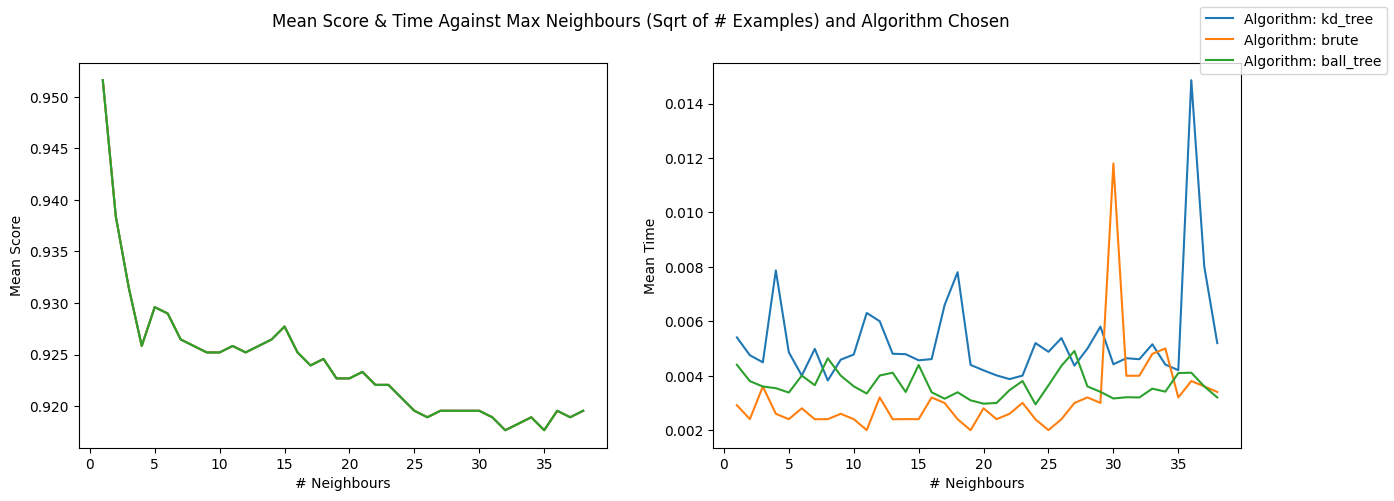

In [93]:
import matplotlib.pyplot as plt
att = [x for x in knn_gscv.cv_results_]

scores = [x for x in knn_gscv.cv_results_['mean_test_score']]
times = [x for x in knn_gscv.cv_results_['mean_fit_time']]


# This line is showing that, apprently the score for each algorithm is EXACTLY the same, which I'm refusing the believe
print(knn_gscv.cv_results_['mean_test_score'])
print(scores[:114//3] == scores[114//3: 2 * (114//3)] == scores[2 * (114//3) : 3 * (114 // 3)])


scores = np.array(scores).reshape(len(knn_algorithms), max_neighbours-1)
times = np.array(times).reshape(len(knn_algorithms), max_neighbours-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Mean Score & Time Against Max Neighbours (Sqrt of # Examples) and Algorithm Chosen')
for idx, alg in enumerate(knn_algorithms):
    ax1.plot(range(1, max_neighbours), scores[idx], label='Algorithm: ' + alg)
    ax2.plot(range(1, max_neighbours), times[idx], label='Algorithm: ' + alg)
    
ax1.set(xlabel='# Neighbours', ylabel='Mean Score') 
ax2.set(xlabel='# Neighbours', ylabel='Mean Time') 
    
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

## Important Note

The left graph has the exact same score for all 3 algorithms, which I'm unsure why and is something I'll have to try and figure out.. Ask victor, maybe not a problem?

# K-NN What the heck
Done KNN 3 different ways, all with super high accuracies and best K being at 1. Ask victor, not sure if something is messed up??

### Trying to project onto 2D Subspacehaha

In [128]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def pca_decomp(data: np.ndarray) -> np.ndarray:
    u, s, vh = np.linalg.svd(data, full_matrices=True)

    return vh

# Just dropping the label column from our dataset 
X, Y = split_df(df)

X = X.to_numpy()

# 3D Projection

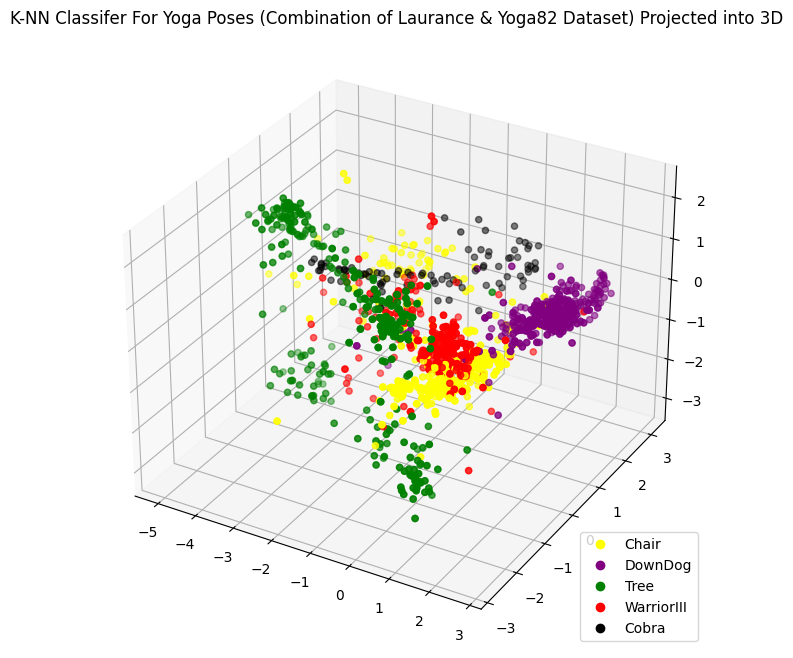

In [129]:
# Calculating our PCs
W = pca_decomp(X)[:3]
Z = np.matmul(X, W.transpose())

first_dimension = Z[:,0]
second_dimension = Z[:,1]
third_dimension = Z[:,2]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(first_dimension, second_dimension, third_dimension, c=Y, cmap = ListedColormap(['yellow','purple','blue','green','red', 'black']))
plt.legend(handles=scatter.legend_elements()[0], labels=classes, loc='lower right')
plt.title("Data For Yoga Poses (Combination of Laurance & Yoga82 Dataset) Projected into 3D")
plt.show()


# 2D Projection

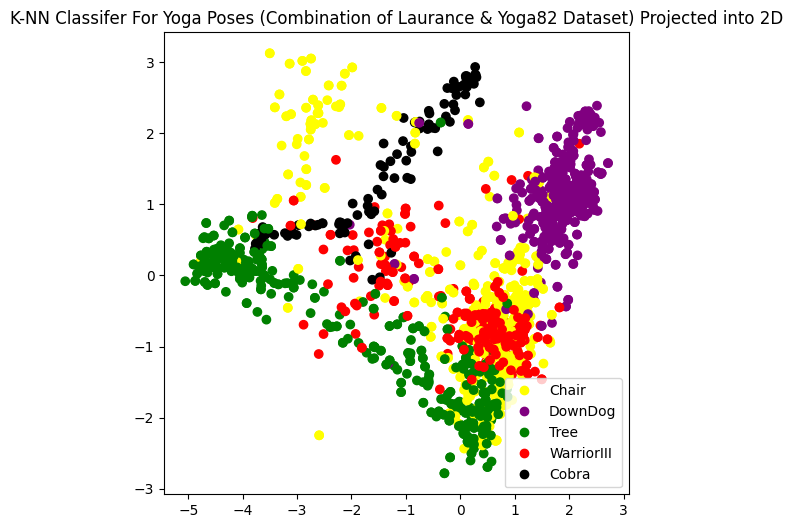

In [130]:
# Calculating our PCs
W = pca_decomp(X)[:3]
Z = np.matmul(X, W.transpose())

first_dimension = Z[:,0]
second_dimension = Z[:,1]

plt.figure(figsize=(6,6))

scatter = plt.scatter(first_dimension, second_dimension, c=Y, cmap = ListedColormap(['yellow','purple','blue','green','red', 'black']))
plt.legend(handles=scatter.legend_elements()[0], labels=classes, loc='lower right')
plt.title("K-NN Classifer For Yoga Poses (Combination of Laurance & Yoga82 Dataset) Projected into 2D")
plt.show()